In [1]:
# import sys

In [2]:
# sys.path.insert(0, '/Users/spx8sk/work/git/adahessian')
# sys.path.insert(0, '/Users/spx8sk/work/git/ada-hessian')

In [3]:
# from ada_hessian import AdaHessian

In [4]:
# https://medium.com/@benjamin.phillips22/simple-regression-with-neural-networks-in-pytorch-313f06910379

In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data
from torch.utils.data import TensorDataset, DataLoader

In [2]:
import torch_optimizer as optim
# https://github.com/jettify/pytorch-optimizer
# lots of optimisers

In [3]:
# https://aladdinpersson.medium.com/how-to-get-a-progress-bar-in-pytorch-72bdbf19b35c
# from tqdm import tqdm
# from time import sleep

# from tqdm.notebook import trange, tqdm
# from tqdm.auto import tqdm


In [4]:
from fastprogress.fastprogress import master_bar, progress_bar

from time import sleep
import random

In [5]:
# example
def run_bar_example():
    epochs = 5
    mb = master_bar(range(1, epochs+1))
    # optional: graph legend: if not set, the default is 'train'/'valid'
    # mb.names = ['first', 'second']
    train_loss, valid_loss = [], []
    for epoch in mb:
        # emulate train sub-loop
        for batch in progress_bar(range(2), parent=mb): sleep(0.2)
        train_loss.append(0.5 - 0.06 * epoch + random.uniform(0, 0.04))

        # emulate validation sub-loop
        for batch in progress_bar(range(2), parent=mb): sleep(0.2)
        valid_loss.append(0.5 - 0.03 * epoch + random.uniform(0, 0.04))

# run_bar_example()

In [6]:
import matplotlib.pyplot as plt

In [7]:
import numpy as np

In [8]:
torch.manual_seed(1)    # reproducible

In [9]:

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)
# y = 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)


In [10]:
# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)

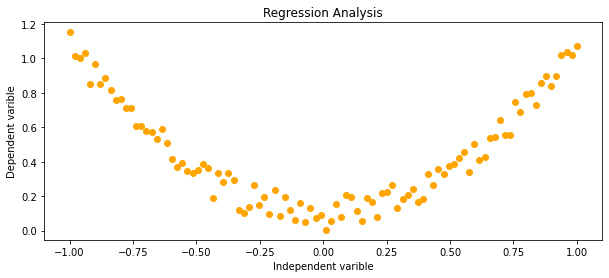

In [11]:

# view data
plt.figure(figsize=(10,4))
plt.scatter(x.data.numpy(), y.data.numpy(), color = "orange")
plt.title('Regression Analysis')
plt.xlabel('Independent varible')
plt.ylabel('Dependent varible')
plt.show()


In [12]:

# this is one way to define a network
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        
        self.linear_relu_stack = torch.nn.Sequential(
            torch.nn.Linear(n_feature, n_hidden),
            torch.nn.ReLU(),
            torch.nn.Linear(n_hidden, n_hidden),
            torch.nn.ReLU(),
            torch.nn.Linear(n_hidden, n_hidden),
            torch.nn.ReLU(),
            torch.nn.Linear(n_hidden, n_output)
        )

    def forward(self, x):
        return self.linear_relu_stack(x)

In [13]:
def train(net, optimizer, NUM_EPOCHS=100, batch_size=100):


    loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss


    ds = TensorDataset(x, y)
#     loader = DataLoader(ds, batch_size=batch_size, shuffle=True)
    loader = DataLoader(ds, batch_size=batch_size, shuffle=False)


    losses = []
    # train the network
    mb = master_bar(range(1, NUM_EPOCHS+1))
    for epoch in mb:
#     for epoch in range(NUM_EPOCHS):
#         loop = tqdm(enumerate(loader), total=len(loader), desc='2nd loop', leave=False)
#         loop = master_bar(enumerate(loader), total=len(loader))
#         loop = master_bar(enumerate(loader), total=len(loader))
        for batch_idx in progress_bar(range(len(loader)), parent=mb):
            (xx, yy) = next(iter(loader))
            
            prediction = net(xx)     # input x and predict based on x
            loss = loss_func(prediction, yy)     # must be (1. nn output, 2. target)
            optimizer.zero_grad()   # clear gradients for next train
            loss.backward(create_graph=True)         # backpropagation, compute gradients
            optimizer.step()        # apply gradients
            losses.append(loss.item())
            
            ### Add the closure function to calculate the gradient.
#             def closure():
#                 if torch.is_grad_enabled():
#                     optimizer.zero_grad()
#                 output = net(xx)
#                 loss = loss_func(output, yy)
#                 if loss.requires_grad:
#                     loss.backward()
#                 return loss
#             optimizer.step(closure)

#             output = net(xx)
#             losses.append(closure())

            
            mb.child.comment = f'batch bar stat'
        mb.main_bar.comment = f'epoch bar stat'

            # add stuff to progress bar in the end
#             loop.set_description(f"Epoch [{epoch}/{NUM_EPOCHS}]")
#             loop.set_postfix(loss=loss.item())
    #         sleep(0.1)
#             loop.update(1)
#         loop.close(); del loop
    
    return net, losses

CPU times: user 1min 19s, sys: 9.92 s, total: 1min 29s
Wall time: 1min 9s


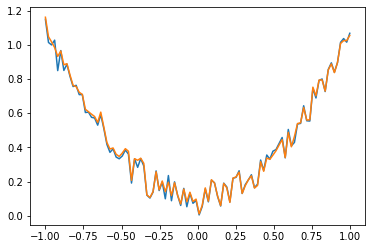

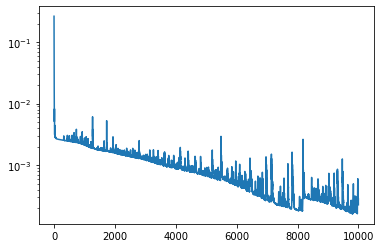

In [17]:
%%time
net = Net(n_feature=1, n_hidden=320, n_output=1)     # define the network
# print(net)  # net architecture

optimizer = torch.optim.Adam(net.parameters(), lr=0.002)
# optimizer = torch.optim.AdamW(net.parameters(), lr=0.002)
# optimizer = torch.optim.LBFGS(net.parameters(), lr=0.002)
# optimizer = AdaHessian(net.parameters(), lr=1e-3)
# optimizer = optim.AdamP(net.parameters(), lr=1e-3)
# optimizer = optim.DiffGrad(net.parameters(), lr=1e-3)
# optimizer = optim.QHAdam(net.parameters(), lr=1e-3)
# optimizer = optim.RAdam(net.parameters(), lr=1e-3)
# optimizer = optim.Adahessian(net.parameters(), lr=0.002)


# net, losses = train(net, optimizer=optimizer, NUM_EPOCHS=100000)
# net, losses = train(net, optimizer=optimizer, NUM_EPOCHS=10000, batch_size=100)
net, losses = train(net, optimizer=optimizer, NUM_EPOCHS=10000, batch_size=100)
# net, losses = train(net, optimizer=optimizer, NUM_EPOCHS=50000, batch_size=20)

# net, losses = train(net, optimizer=optimizer, NUM_EPOCHS=1000, batch_size=20)

plt.figure()
plt.plot(x, y)
plt.plot(x, net(x).detach().numpy())


plt.figure()
plt.plot(losses)
plt.yscale('log')


In [18]:
len(losses)

10000

In [19]:
def count_parameters(model):
    """
    https://discuss.pytorch.org/t/how-do-i-check-the-number-of-parameters-of-a-model/4325/7
    """
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [20]:
count_parameters(net)

206401

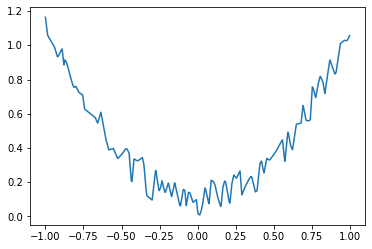

In [21]:

plt.figure()
plt.plot(torch.linspace(-1, 1, 2000), net(torch.unsqueeze(torch.linspace(-1, 1, 2000), dim=1)).detach().numpy())


In [26]:
def train_ensemble(n_ensembles):
    nets = []
    losses = []
    
#     for i in tqdm(range(n_ensembles), desc='1st loop', position = 0, leave=True):
    for i in progress_bar(range(n_ensembles)):
#     for i in range(n_ensembles):
        net = Net(n_feature=1, n_hidden=320, n_output=1)     # define the network
#         print(net)  # net architecture
        optimizer = torch.optim.Adam(net.parameters(), lr=0.002)
#         optimizer = torch.optim.AdamW(net.parameters(), lr=0.002)
#         optimizer = AdaHessian(net.parameters(), lr=1e-3)
#         optimizer = optim.AdamP(net.parameters(), lr=1e-3)
#         optimizer = optim.DiffGrad(net.parameters(), lr=1e-3)
#         optimizer = optim.QHAdam(net.parameters(), lr=1e-3)
#         optimizer = optim.RAdam(net.parameters(), lr=1e-3)

        net, loss = train(net, optimizer=optimizer, NUM_EPOCHS=10000, batch_size=100)
        
        nets.append(net)
        losses.append(loss)
        
    return nets, losses

In [27]:
%%time
nets, losses = train_ensemble(2)

CPU times: user 2min 31s, sys: 17 s, total: 2min 47s
Wall time: 2min 8s


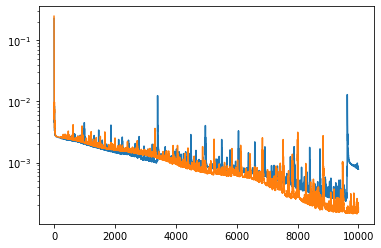

In [28]:
plt.figure()
for loss in losses:
    plt.plot(loss)
plt.yscale('log')

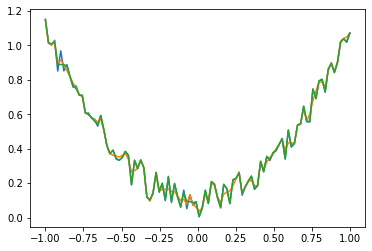

In [29]:
plt.figure()
plt.plot(x, y)
for net in nets:
    plt.plot(x, net(x).detach().numpy())